In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from collections import Counter

In [15]:
movies = pd.read_csv("preprocessed_movies.csv")
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,cast,crew,keywords,top_3_actors,director
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"['Animation', 'Comedy', 'Family']",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,Toy Story,False,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant...","['jealousy', 'toy', 'boy', 'friendship', 'frie...","['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter
1,True,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam...","['board game', 'disappearance', ""based on chil...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"['Romance', 'Comedy']",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark...","['fishing', 'best friend', 'duringcreditssting...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",Howard Deutch
3,True,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas...","['based on novel', 'interracial relationship',...","['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,['Comedy'],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye...","['baby', 'midlife crisis', 'confidence', 'agin...","['Steve Martin', 'Diane Keaton', 'Martin Short']",Charles Shyer


**Step 1:** Convert movie genre information into one-hot vectors using CountVectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
genres = cv.fit_transform(movies.genres)

# The vocabulary contains each genre mapped to an index
cv.vocabulary_

{'animation': 2,
 'comedy': 3,
 'family': 7,
 'adventure': 1,
 'fantasy': 8,
 'romance': 16,
 'drama': 6,
 'action': 0,
 'crime': 4,
 'thriller': 18,
 'horror': 12,
 'history': 11,
 'science': 17,
 'fiction': 9,
 'mystery': 15,
 'war': 20,
 'foreign': 10,
 'music': 14,
 'documentary': 5,
 'western': 21,
 'tv': 19,
 'movie': 13}

In [17]:
# Create a DataFrame to store the one-hot vectors with genre labels as columns
genres = pd.DataFrame(
    genres.toarray(),
    columns=list(sorted(cv.vocabulary_.keys(), key=lambda x: cv.vocabulary_[x]))
)
genres

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46934,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46935,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46936,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
46937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Step 2:** Calculate the distance between movies based on their genre vectors

In [18]:
# Calculate the Euclidean distance between the genre vectors of the first and second movies
a = genres.iloc[0, :]
b = genres.iloc[1, :]
np.linalg.norm(a-b)

2.0

**Step 3:** Use Scikit-Learn's NearestNeighbors(K-NN) to find the most similar movies based on genre vectors


In [19]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=100).fit(genres)
nbrs

NearestNeighbors(n_neighbors=100)

In [20]:
# Find the distances and indexes of the nearest neighbors to movie 'a'
distances, indexes = nbrs.kneighbors([a])

# Retrieve the recommended movies based on their indexes
recommendations = movies.loc[indexes[0], ["title"]]

# Add the distances as a column in the recommendations DataFrame
recommendations["distance"] = distances[0]
recommendations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,title,distance
14398,Cloudy with a Chance of Meatballs,0.0
39540,Hammy's Boomerang Adventure,0.0
13713,Kung Fu Panda: Secrets of the Furious Five,0.0
39539,Madly Madagascar,0.0
6872,Looney Tunes: Back in Action,0.0
...,...,...
2481,Doug's 1st Movie,0.0
17478,Open Season 3,0.0
43687,The Boss Baby,0.0
31292,Scooby-Doo! and the Samurai Sword,0.0


**Step 4: **Combine genre-based recommendations with movie ratings

In [21]:
ratings = pd.read_csv("ratings_small.csv")

# Calculate the mean and count of ratings for each movie
ratings_mean_count = ratings.groupby("movieId").agg({"rating": ["mean", "count"]})
ratings_mean_count.columns = ["ratings_mean", "ratings_count"]

# Round the mean rating to one decimal place
ratings_mean_count.ratings_mean = ratings_mean_count.ratings_mean.round(1)
ratings_mean_count

,ratings_mean,ratings_count
movieId,,
1,3.9,247
2,3.4,107
3,3.2,59
4,2.4,13
5,3.3,56
...,...,...
161944,5.0,1
162376,4.5,1
162542,5.0,1


In [22]:
# Merge the recommendations DataFrame with the ratings data based on movieId
recommendations = pd.merge(recommendations, ratings_mean_count, left_index=True, right_index=True, how="left")

# Sort the recommendations by distance, mean rating, and rating count in descending order
recommendations.sort_values(["distance", "ratings_mean", "ratings_count"], ascending=[True, False, False], inplace=True)
recommendations

,title,distance,ratings_mean,ratings_count
702,Oliver & Company,0.0,5.0,1.0
1131,The Wrong Trousers,0.0,4.1,17.0
26702,Scooby-Doo! Camp Scare,0.0,4.0,1.0
8338,The SpongeBob SquarePants Movie,0.0,3.8,3.0
2481,Doug's 1st Movie,0.0,3.8,2.0
...,...,...,...,...
31236,Rover Dangerfield,0.0,NaN,NaN
17478,Open Season 3,0.0,NaN,NaN
43687,The Boss Baby,0.0,NaN,NaN
31292,Scooby-Doo! and the Samurai Sword,0.0,NaN,NaN


**Step 5:** Visualize genre distribution using PCA

In [23]:
from sklearn.decomposition import PCA

genre_decomposed = PCA(n_components=2).fit_transform(genres)
genre_decomposed.shape

(46939, 2)

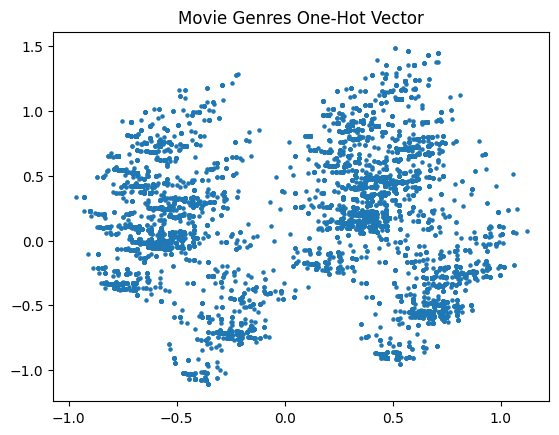

In [24]:
import matplotlib.pyplot as plt

plt.title("Movie Genres One-Hot Vector")
plt.scatter(genre_decomposed[:, 0], genre_decomposed[:, 1], 5)
plt.show()

**Step 6:** Extract and display recommendations for the movie "The Dark Knight"

In [25]:
# Function to print recommendations
def print_recommendations(recommendations_df):
    print("Recommended Movies:")
    for index, row in recommendations_df.iterrows():
        print(f"{row['title']} - Similarity: {row['distance']}, Average Rating: {row['ratings_mean']}, Rating Count: {row['ratings_count']}")

# Extract and display recommendations for the movie "The Dark Knight"
the_dark_knight_idx = movies[movies['title'] == 'The Dark Knight'].index[0]
distances, indexes = nbrs.kneighbors([genres.iloc[the_dark_knight_idx]])
dark_knight_recommendations = movies.loc[indexes[0], ["title"]]
dark_knight_recommendations["distance"] = distances[0]
dark_knight_recommendations = pd.merge(dark_knight_recommendations, ratings_mean_count, left_index=True, right_index=True, how="left")
dark_knight_recommendations.sort_values(["distance", "ratings_mean", "ratings_count"], ascending=[True, False, False], inplace=True)

# Display the recommendations for "The Dark Knight"
print("Recommendations for The Dark Knight:")
display(dark_knight_recommendations)

Recommendations for The Dark Knight:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,title,distance,ratings_mean,ratings_count
3281,The Asphalt Jungle,0.0,5.0,1.0
7355,Man on Fire,0.0,5.0,1.0
5114,The Long Good Friday,0.0,4.6,5.0
280,New York Cop,0.0,4.1,22.0
3347,Death Wish 3,0.0,4.1,6.0
...,...,...,...,...
17634,Takers,0.0,NaN,NaN
19338,House of the Rising Sun,0.0,NaN,NaN
45252,Walking Tall: Lone Justice,0.0,NaN,NaN
16462,The Brotherhood,0.0,NaN,NaN
